In [ ]:
import numpy
from numpy import *
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
data_raw = genfromtxt("/content/MyDrive/MyDrive/Data/PRNN/Assignment_1/p4_train.csv",delimiter = ",")

In [ ]:
X_raw,Y_raw = data_raw[1:,1:],data_raw[1:,0]
noise = 0.01*random.randn(X_raw.shape[0],X_raw.shape[1])
X_raw = X_raw/255 + noise

In [ ]:
X_raw.shape

(60000, 784)

In [ ]:
len(X_raw)

60000

In [ ]:
X_raw1 = []

for i in range(len(X_raw)):
  X_raw1.append(X_raw[i].reshape(28,28))

In [ ]:
X_raw1[0].shape

(28, 28)

In [ ]:
X_raw_resize = []
for i in range(len(X_raw)):
  X_raw_resize.append(resize(X_raw1[i],(10,10)))

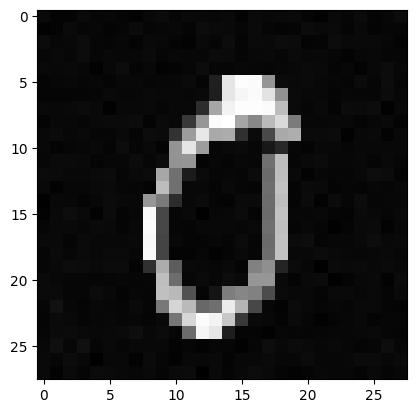

In [ ]:
plt.imshow(X_raw1[0],cmap = "gray")
plt.show()

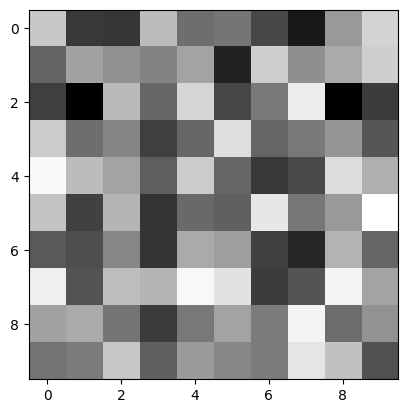

In [ ]:
plt.imshow(X_raw_resize[0],cmap = "gray")
plt.show()

In [ ]:
N,d = X_raw.shape
Ns = 10000

In [ ]:
random_samples = random.choice(arange(N),Ns)

In [ ]:
X_use,Y_use = X_raw[random_samples],Y_raw[random_samples]

In [ ]:
tts_ratio = 0.6
train_split = round(tts_ratio * Ns)
test_split = int(Ns-train_split)

train_split,test_split

(6000, 4000)

In [ ]:
X_train,Y_train = X_use[0:train_split],Y_use[0:train_split]
X_test,Y_test = X_use[Ns-test_split:Ns],Y_use[Ns-test_split:Ns]
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((6000, 784), (6000,), (4000, 784), (4000,))

In [ ]:
X_pca = cov(X_train.transpose())

In [ ]:
eigen_values,eigen_vectors = linalg.eig(X_pca)

In [ ]:
eigenvalues,eigenvectors = linalg.eig(X_pca)

In [ ]:
eigen_indices = argsort(eigen_values)[::-1]

In [ ]:
eigenvectors_sorted = eigen_vectors[eigen_indices]

In [ ]:
eigenvectors_sorted
variance_explained = []
for i in eigen_values :
  variance_explained.append((i/sum(eigen_values))*100)
print(variance_explained)

[7.854074680686496, 5.809135849732369, 4.452907909903615, 3.6917523594612054, 3.398799875540025, 2.6917304717199095, 2.4261524314719685, 2.0721360758939085, 2.025073272366528, 1.6718534078542329, 1.6216076735071199, 1.4418045135153417, 1.3630348385781748, 1.2100783338699148, 1.183634179661059, 1.1507882539321679, 1.0916914183819488, 1.0551513310244676, 1.0404147679489222, 1.010415399522626, 0.9715897411490201, 0.9170590859223686, 0.8897332159455422, 0.8402524732315677, 0.8235914312206031, 0.7977827843787831, 0.7800038600160262, 0.7335452544597246, 0.7225915322440154, 0.709722464555135, 0.6832738905771405, 0.6665173311496732, 0.6536295511464554, 0.6484531524928536, 0.6342380819063405, 0.5897896738748316, 0.5760158048880885, 0.583565078734139, 0.5411217261148487, 0.5324754936983336, 0.5246986615344158, 0.5115904797058272, 0.5101106946419606, 0.4925007963180441, 0.47362154940566586, 0.46603047951415927, 0.45457892567619734, 0.4604429082282407, 0.4480325387840845, 0.43869244699866916, 0.43

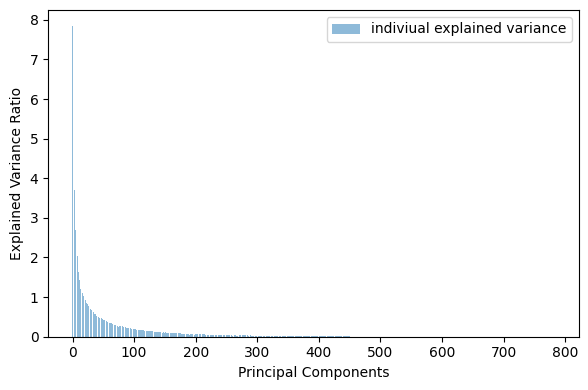

In [ ]:
with plt.style.context("ggplot"):
  plt.figure(figsize = (6,4))
plt.bar(range(d),variance_explained,alpha = 0.5, align = "center", label = "indiviual explained variance")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

X_train_pca = pca.fit_transform(X_train)


In [ ]:
X_train_pca[0].shape

(10,)

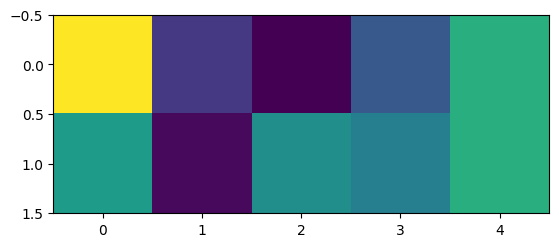

In [ ]:
plt.imshow(X_train_pca[0].reshape(2,5))
plt.show()

In [ ]:
X_test_pca = pca.transform(X_test)

In [ ]:
X_test_pca.shape

(4000, 10)

In [ ]:
X_train_pca[0]-X_train[0,0:10]

array([ 2.35848504, -0.69879752, -1.31976529, -0.27727079,  1.00751274,
        0.6975423 , -1.23768758,  0.49391889,  0.2614542 ,  0.98729573])

In [ ]:
J = len(unique(Y_train))

x_class=[]

for j in range(J):
  idx = array(where(Y_train == j))
  x_class.append(X_train_pca[idx])
print(x_class[0][0].shape)

(623, 10)


In [ ]:
def Gaussian_Density_fn(x,mu,sigma):

    constant = 1/sqrt(2*pi*sigma**2)
    term = exp(-(((x-mu)**2)/(2*sigma**2)))
    pdf = constant*term
    return pdf


In [ ]:
def MultivariateGaussianPDF(x,mu,sigma):

  #print(len(x))
  constant = 1/(sqrt((2*pi)**len(x))*linalg.det(sigma)**(1/2))
  term = exp(-((x-mu).reshape(len(x),1).transpose() @ linalg.inv(sigma) @ (x-mu).reshape(len(x),1))/2)

  return constant * term

In [ ]:
num_components = 3
epsilon = 10**-1
number_of_iterations = 30

In [ ]:
def EM(x):

  llh =[]
  alphas = ones((num_components,1))/num_components

  mus = random.randn(num_components,shape(x)[1])

  variances = array([eye(shape(x)[1]) for m in range(num_components)])

  pxi0 = zeros((num_components,shape(x)[0]))
  gammas = zeros((num_components,shape(x)[0]))

  for ii in range(number_of_iterations):
    if ii==0:
      for m in range(num_components):
        for i in range(shape(x)[0]):
           pxi0[m,i] = MultivariateGaussianPDF(x[i].reshape(shape(x)[1],),mus[m],variances[m])*alphas[m]
    else:
      pxi0 = pxi1

    for m in range(num_components):
      for i in range(shape(x)[0]):
        gammas[m,i] = pxi0[m,i]/numpy.sum(pxi0[:,i])

    llh1 = 0
    for i in range(shape(x)[0]):
      llh1 = llh1 + log(numpy.sum(pxi0[:,i]))
    if ii==0:
      llh.append(llh1)

    #Updation Occurs Here!!!

    for m in range(num_components):
      alphas[m] = numpy.sum(gammas[m,:])/shape(x)[0]
    #print(alphas)

    for m in range(num_components):

      sum_mu = 0
      for i in range(shape(x)[0]):
        sum_mu = sum_mu + gammas[m,i]*x[i]
      mus[m] = sum_mu/numpy.sum(gammas[m,:])
    #print(mus)

    for m in range(num_components):
      sum_var = 0
      for i in range(shape(x)[0]):
           sum_var = sum_var + gammas[m,i]*(dot((x[i]-mus[m]).reshape(shape(x)[1],1),(x[i]-mus[m]).reshape(shape(x)[1],1).transpose()))
      variances[m] = sum_var / numpy.sum(gammas[m,:])


    #print(variances)
    pxi1 = zeros((num_components,shape(x)[0]))

    for m in range(num_components):
      for i in range(shape(x)[0]):
        pxi1[m,i] = MultivariateGaussianPDF(x[i].reshape(shape(x)[1],),mus[m],variances[m])*alphas[m]    #print(pxi0)

    llh2 = 0

    for i in range(shape(x)[0]):
      llh2 = llh2 + log(numpy.sum(pxi1[:,i]))
    llh.append(llh2)

    if abs(llh[ii]-llh[ii-1])<=epsilon:
      print("At iteration : {0}".format(ii),"our EM Algorithm Converges")
      print("And the loglikelyhood (till this iteration {0}) is :".format(ii+1),llh)
      break
    elif(ii==number_of_iterations-1):
      print("the loglikelyhood for the given class is (for all iterations till {0}) :".format(ii+1),llh)

  return alphas,mus,variances


In [ ]:
def train(data,classes):

  J = len(unique(classes))
  x_class=[]

  for j in range(J):
    idx = array(where(classes == j))
    x_class.append(data[idx])

  ALPHA = []
  MU = []
  SIGMA = []
  for j in range(J):
    print("Class {0}".format(j))
    alpha,mu,sigma = EM(x_class[j][0])
    ALPHA.append(alpha)
    MU.append(mu)
    SIGMA.append(sigma)
  return ALPHA , MU, SIGMA


In [ ]:
ALPHA,MU,SIGMA = train(X_train_pca,Y_train)

Class 0
At iteration : 21 our EM Algorithm Converges
And the loglikelyhood (till this iteration 22) is : [-11728.034206422126, -5744.119726071236, -5650.348815266207, -5612.445058354165, -5599.0382550752565, -5592.125056940086, -5587.274254626145, -5584.1410523871455, -5581.900976631697, -5579.9806641405, -5578.034434176365, -5576.008172532764, -5574.337500061153, -5573.086861428565, -5572.218749447183, -5571.636315992502, -5571.224221249338, -5570.918953172477, -5570.687233779038, -5570.51486464897, -5570.392236433367, -5570.305488034957, -5570.240268691402]
Class 1
the loglikelyhood for the given class is (for all iterations till 30) : [-10752.144255274537, -4337.481468374017, -4252.7797664975205, -4226.004372310437, -4212.680749906375, -4202.384769879219, -4190.664633002125, -4179.097314872774, -4170.562277107539, -4163.049561772511, -4156.305399663487, -4150.890782189874, -4146.759627051349, -4143.4536102409875, -4140.476192826653, -4137.997320107497, -4136.12770143323, -4134.72050

In [ ]:
ALPHA[0].shape

(3, 1)

In [ ]:
def test(xtest):

  pxi = zeros((J,shape(xtest)[0]))

  for j in range(J):
    for i in range(shape(xtest)[0]):
      temparr = zeros((num_components,1))
      for m in range(num_components):
        temparr[m] = MultivariateGaussianPDF(xtest[i],MU[j][m],SIGMA[j][m])
      pxi[j,i] = dot(ALPHA[j].transpose() , temparr)

  y_pred = zeros((shape(xtest)[0],1))

  for i in range(shape(xtest)[0]):
    y_pred[i] = argmax(pxi[:,i])

  return y_pred

In [ ]:
y_pred = test(X_test_pca)

In [ ]:
y_pred

array([[4.],
       [9.],
       [7.],
       ...,
       [3.],
       [2.],
       [5.]])

In [ ]:
def evaluation(ytest):
    c=0

    for i in range(shape(ytest)[0]):
      if y_pred[i] == ytest[i]:
        c = c+1

    accuracy = (c/shape(ytest)[0])*100

    print("Accuracy:",accuracy)

    return accuracy

In [ ]:
evaluate = evaluation(Y_test)

Accuracy: 94.6
